## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(".../input/House Prices - Advanced Regression Techniques/train.csv")
display(df_train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Information of Train dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Missing values
df_train.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
dtype: int64

In [9]:
# How many columns and rows
display(df_train.shape)

(1460, 81)

## Visualize the target 

In [13]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice')

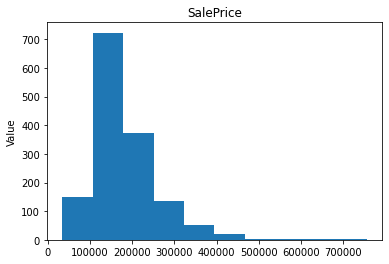

In [14]:
plt.hist(x = df_train["SalePrice"])
plt.ylabel("Value")
plt.title("SalePrice")

Text(0.5, 1.0, 'SalePrice')

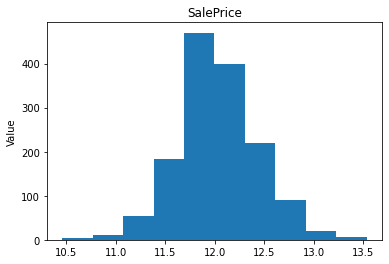

In [15]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])
plt.hist(x = df_train["SalePrice"])
plt.ylabel("Value")
plt.title("SalePrice")

### Find highly correlated feature variables

In [3]:
maxcorr_train = df_train.corr()
maxcorr_train = maxcorr_train["SalePrice"].sort_values(ascending=False)
print(maxcorr_train)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

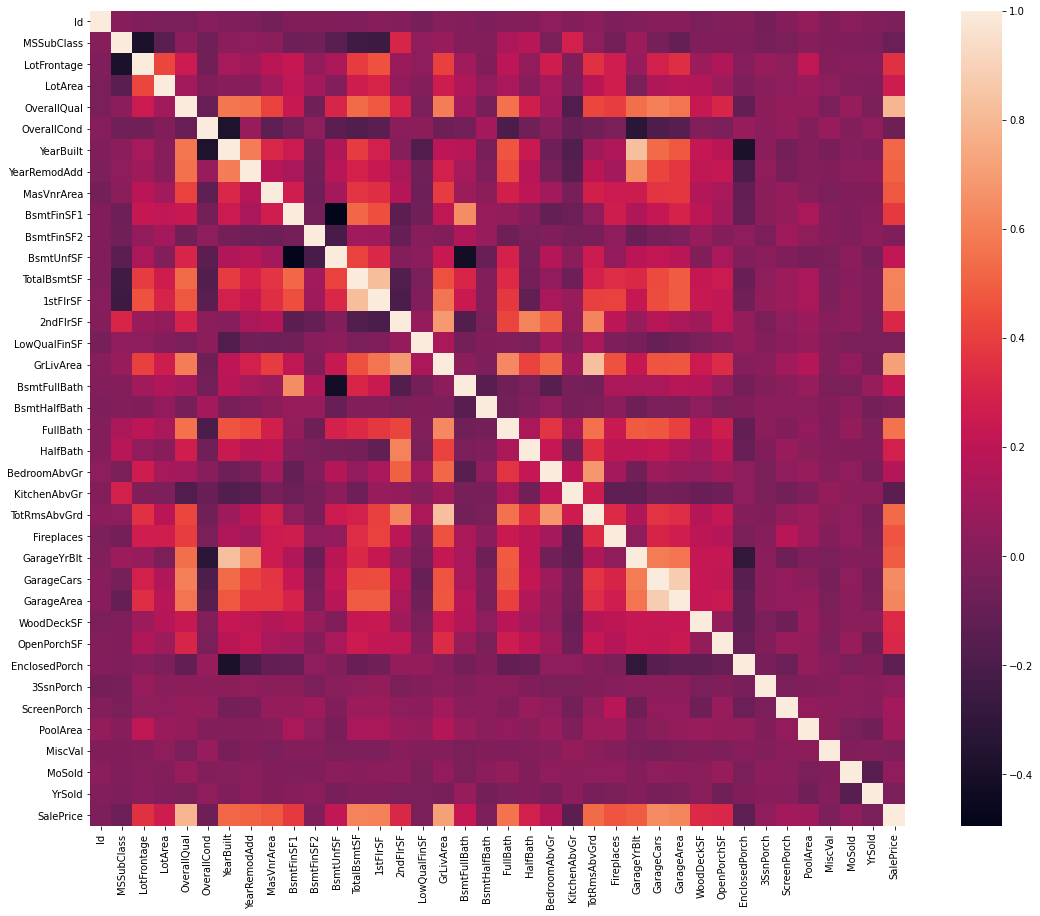

In [4]:
# See highly correlation in heatmap
corrmatrix_train = df_train.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix_train, square=True)

In [5]:
# See the higly corr top of ten features
corrmatrix_train.loc["SalePrice"].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

## Visualize the target and variables

In [16]:
# Overall quality
OverallQual = df_train['OverallQual']
print(OverallQual)

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallQual', ylabel='count'>

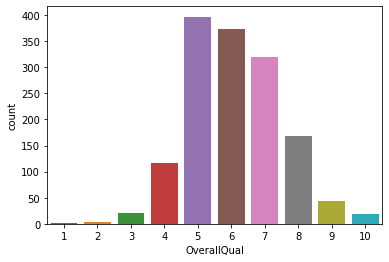

In [17]:
sns.countplot(OverallQual)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

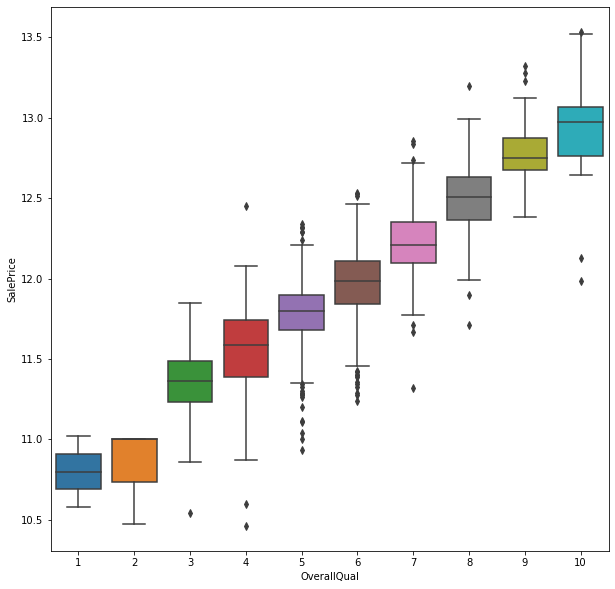

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(OverallQual, df_train["SalePrice"])

In [19]:
# FullBath
FullBath = df_train["FullBath"]
print(FullBath)

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FullBath', ylabel='count'>

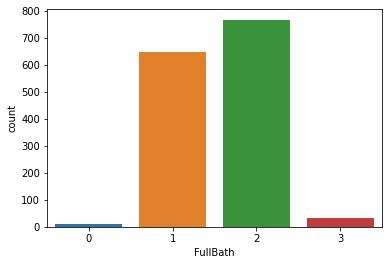

In [20]:
sns.countplot(FullBath)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

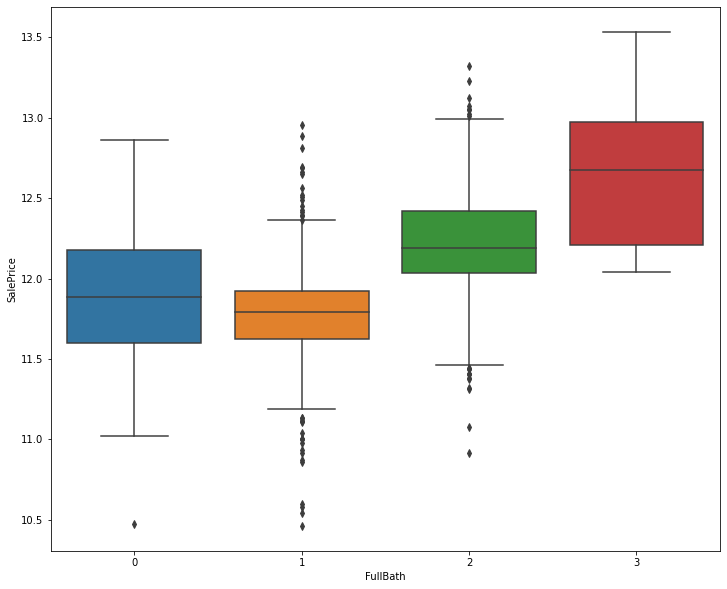

In [21]:
plt.figure(figsize=(12, 10))
sns.boxplot(FullBath, df_train["SalePrice"])

In [22]:
# GarageCars
GarageCars = df_train["GarageCars"]
print(GarageCars)

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageCars', ylabel='count'>

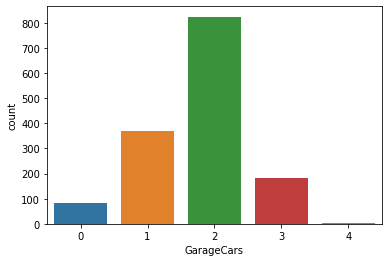

In [23]:
sns.countplot(GarageCars)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

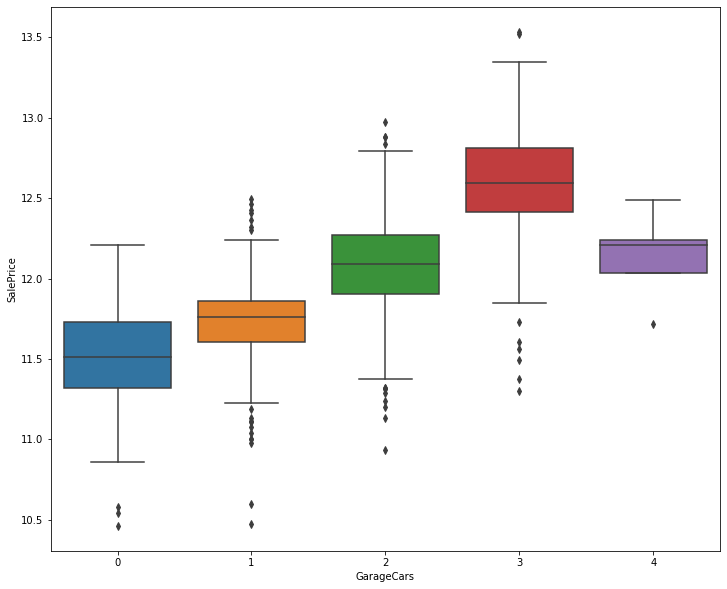

In [24]:
plt.figure(figsize=(12, 10))
sns.boxplot(GarageCars, df_train["SalePrice"])

In [25]:
# BsmtHalfBath
BsmtHalfBath = df_train["BsmtHalfBath"]
print(BsmtHalfBath)

0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

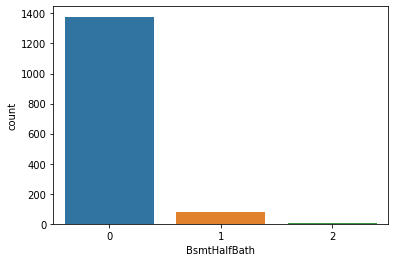

In [26]:
sns.countplot(BsmtHalfBath)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

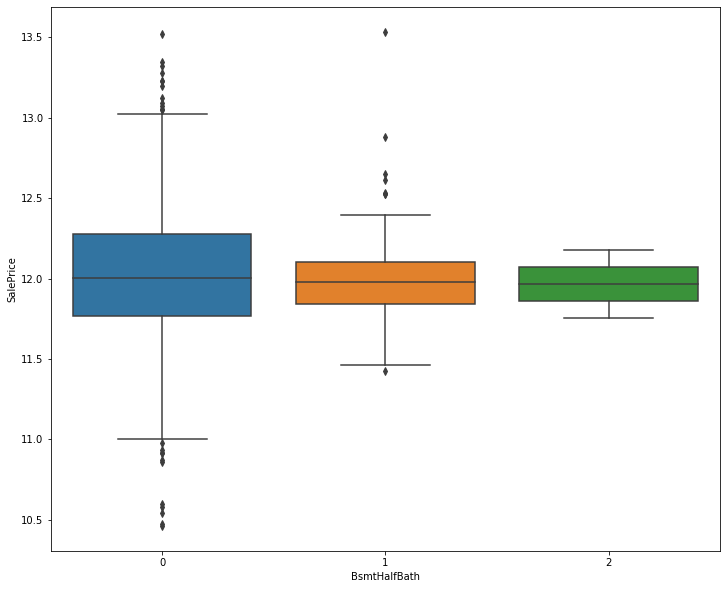

In [27]:
plt.figure(figsize=(12, 10))
sns.boxplot(BsmtHalfBath, df_train["SalePrice"])

In [28]:
# OverallCond
OverallCond = df_train["OverallCond"]
print(OverallCond)

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallCond', ylabel='count'>

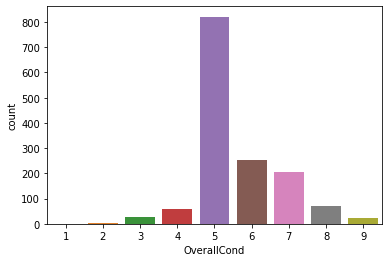

In [29]:
sns.countplot(OverallCond)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

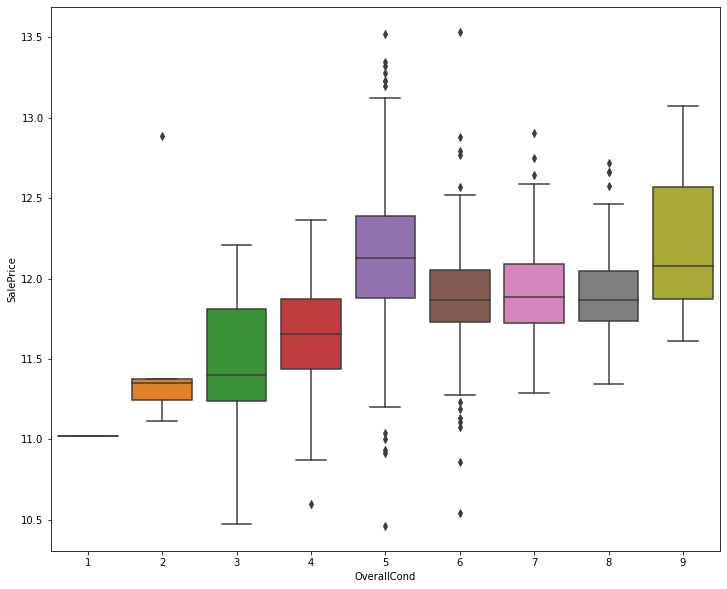

In [30]:
plt.figure(figsize=(12,10))
sns.boxplot(OverallCond, df_train["SalePrice"])

In [31]:
# MSSubClass
MSSubClass = df_train["MSSubClass"]
print(MSSubClass)

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

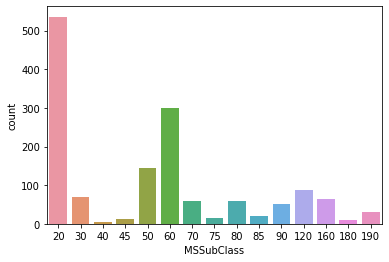

In [32]:
sns.countplot(MSSubClass)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

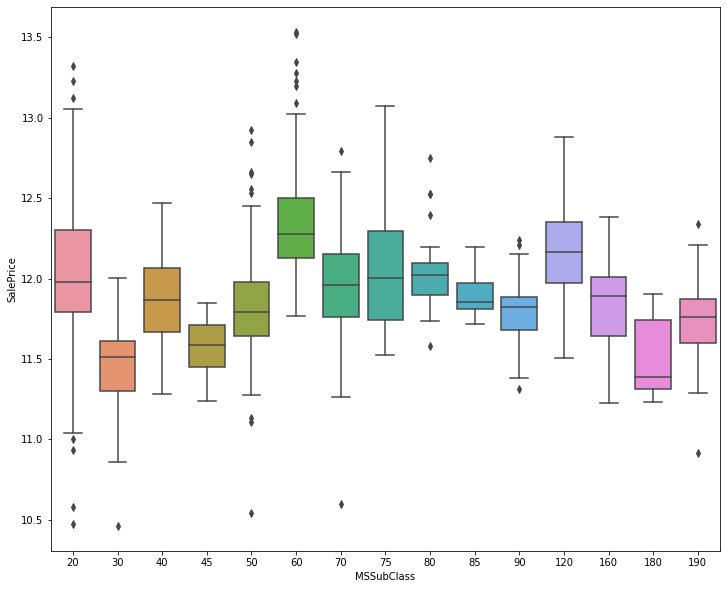

In [33]:
plt.figure(figsize=(12,10))
sns.boxplot(MSSubClass, df_train["SalePrice"])

In [34]:
# GrLivArea 
GrLivArea = df_train["GrLivArea"]
print(GrLivArea)

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

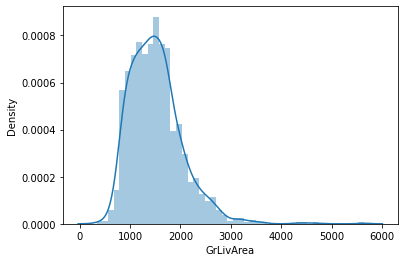

In [35]:
sns.distplot(GrLivArea)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

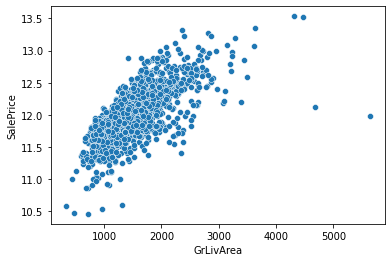

In [36]:
sns.scatterplot(GrLivArea, df_train["SalePrice"])

In [37]:
# YearBuilt
YearBuilt = df_train["YearBuilt"]
print(YearBuilt)

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

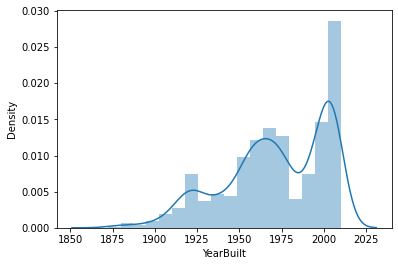

In [38]:
sns.distplot(YearBuilt)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

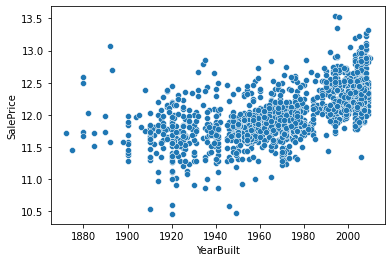

In [39]:
sns.scatterplot(YearBuilt, df_train["SalePrice"])

In [40]:
# TotalBsmtSF
TotalBsmtSF = df_train["TotalBsmtSF"]
print(TotalBsmtSF)

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

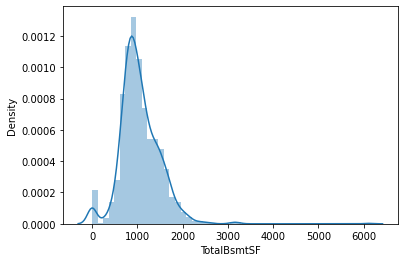

In [41]:
sns.distplot(TotalBsmtSF)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

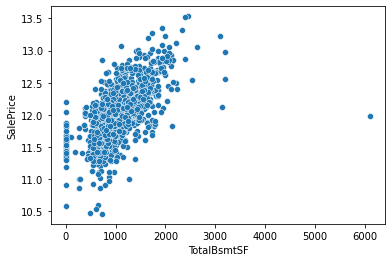

In [42]:
sns.scatterplot(TotalBsmtSF, df_train["SalePrice"])

In [43]:
# GarageArea
GarageArea = df_train["GarageArea"]
print(GarageArea)

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

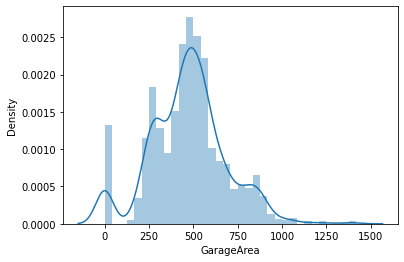

In [44]:
sns.distplot(GarageArea)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

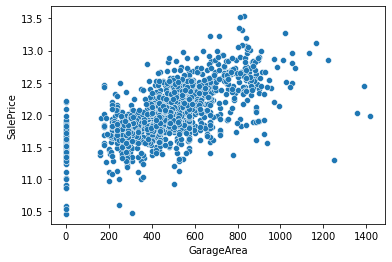

In [45]:
sns.scatterplot(GarageArea, df_train["SalePrice"])

In [46]:
# YrSold
YrSold = df_train["YrSold"]
print(YrSold)

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YrSold', ylabel='Density'>

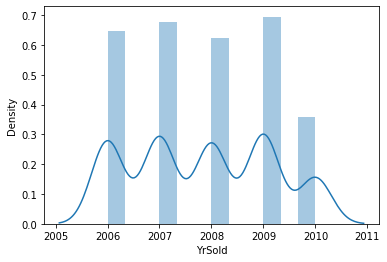

In [47]:
sns.distplot(YrSold)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

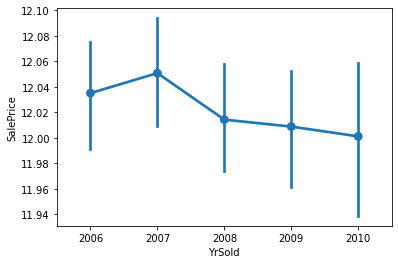

In [48]:
sns.pointplot(YrSold, df_train["SalePrice"])

In [50]:
# BsmtFinSF2
BsmtFinSF2 = df_train["BsmtFinSF2"]
print(BsmtFinSF2)

0          0
1          0
2          0
3          0
4          0
        ... 
1455       0
1456     163
1457       0
1458    1029
1459     290
Name: BsmtFinSF2, Length: 1460, dtype: int64


C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

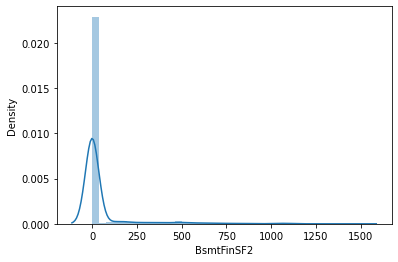

In [51]:
sns.distplot(BsmtFinSF2)

C:\Users\VHD\anaconda3\envs\SI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

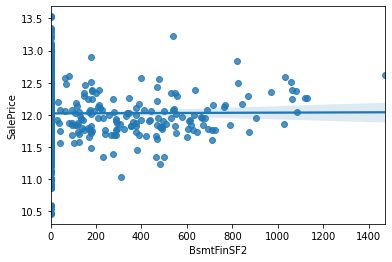

In [52]:
sns.regplot(BsmtFinSF2, df_train["SalePrice"])